<a href="https://colab.research.google.com/github/Angy-face/Algorithms/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jan 11 14:03:55 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
(Xtrain,Ytrain),(Xtest,Ytest) = tf.keras.datasets.mnist.load_data()
Xtrain .shape,Ytrain.shape

((60000, 28, 28), (60000,))

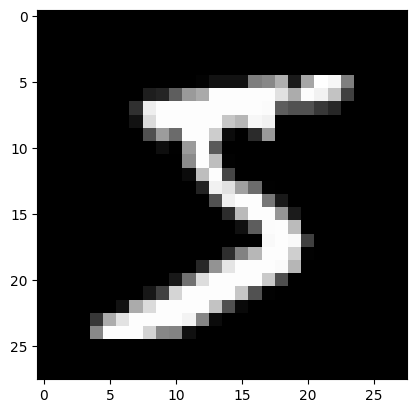

In [4]:
import matplotlib.pyplot as plt
plt.imshow(Xtrain[0],cmap='gray')
plt.show()

In [5]:
Xtrain = Xtrain.reshape(-1,28*28)
Xtest =Xtest.reshape(-1,28*28)
Xtrain.shape

(60000, 784)

In [6]:
#One-Hot encoding
Ytrain = tf.keras.utils.to_categorical(Ytrain,10)
Ytest = tf.keras.utils.to_categorical(Ytest,10)
Ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [7]:
d_in = (Xtrain.shape[1],)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256,activation='relu',input_shape=d_in))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss=tf.keras.losses.MeanSquaredError())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.fit(Xtrain/255.,Ytrain,epochs=50,batch_size=32,validation_data=(Xtest,Ytest))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0824 - val_loss: 0.0426
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0313 - val_loss: 0.0226
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0191 - val_loss: 0.0196
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0159 - val_loss: 0.0177
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0144 - val_loss: 0.0169
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0131 - val_loss: 0.0163
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0123 - val_loss: 0.0155
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0116 - val_loss: 0.0150
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0109 - val_loss: 0.0141
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0105 - val_loss: 0.0133
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0099 - val_loss: 0.0131
Epoch 12/50
1875/1875 ━━━━━━━━

In [9]:
Z = model.predict(Xtest/255.)
print(np.sum(Z.argmax(axis=1)==Ytest.argmax(axis=1))/len(Ytest))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.9686


In [11]:
Z[0].argmax(axis =0 ),Ytest[0].argmax(axis =0 )

(7, 7)